# Data Science z Python 3.10. Topologia sieci neuronowych
## 🇬🇧 Data Science with Python 3.10. Topology of a Neural Network
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek

In [1]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

# zaimportujemy biblioteki, które pozwolą nam na pracę podczas tego ćwiczenia
# musimy doinstalować tylko jedną z nich (mnist), która zawiera materiał treningowy oraz testowy

### 2. Funkcje aktywacji

W trakcie wykładu omawiane były funkcje aktywacji. Funkcje te cechują się różnymi właściwościami, które sprawiają, że mogą być one przydatne w zadaniach klasyfikacji do jednej z dwóch klas lub do ich większej ilości (np. softmax). Zanim zaczniemy nasze podstawowe zadanie napisz pozostałe funkcje aktywacji, korzystając z podanego szablonu.

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [2]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [3]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x))

[0.58427337 0.21928428 0.19644234]



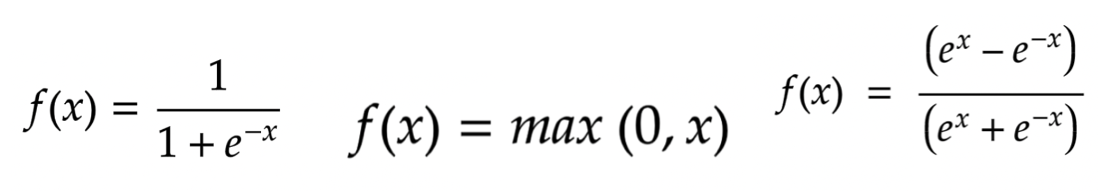

In [4]:
def sigmoid(y):
  return 1/(1+np.exp(-y))
print(sigmoid(y))

0.8807970779778823


In [5]:
def relu(a):
    return max(0,a)
print(relu(a))

0


In [6]:
def tanh(z):
    return (np.exp(z)- np.exp(-z))/(np.exp(z)+np.exp(-z))
print(tanh(z))

0.9993292997390669


### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [7]:
train_images = mnist.train_images()
test_images = mnist.test_images()
train_labels = mnist.train_labels()
test_labels = mnist.test_labels()



Zanim przejdziemy dalej możemy podejrzeć nasze dane. Zastanówmy się do czego odnoszą się liczby 60000 oraz 28?

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 3.2. Normalizacja i "spłaszczenie" danych

Na tym etapie powinniśmy mieć stworzone cztery zmienne odnoszące się do materiału treningowego oraz etykiet (osobno dla zbioru treningowego i testowego). Zanim przejdziemy dalej musimy zadać jeszcze o normalizację. Co właściwie zamierzamy zrobić z naszymi danymi? Chcemy sprowadzić wartości pikseli z zakresu od 0-255 do nowego zakresu -0.5-0.5. Dlaczego to robimy?

In [9]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Możemy jeszcze raz podejrzeć nasze dane, ale na tym etapie jeszcze nic się nie zmieniło.

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Teraz dokonujemy "spłaszczenia" (flatten) naszych danych. Skąd się bierze wartość 784? (to po prostu 28*28 = 784). Każdy obraz w danych treningowych MNIST ma wymiary 28 x 28 (oraz informację odnoszącą się do skali szarości). Spłaszczymy każdy obraz 28x28 do 784-wymiarowego wektora, którego użyjemy jako danych wejściowych do naszej sieci neuronowej.

In [11]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Teraz widzimy, że kształt naszych danych zmienił.

In [12]:
print(train_images.shape)

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

Mamy już przygotowane dane, dokonaliśmy ich normalizacji oraz przeprowadziliśmy "spłaszczenie". Przechodzimy w końcu do etapu tworzenia architektury naszej sieci neuronowej. Wykorzystamy w tym celu klasę Sequential. Mamy do wyboru teraz kilka możliwości, które zależą od danych, które chcemy analizować. 

*   Zważywszy na to, że chcemy przeprowadzić "prostą" klasyfikację danych MNIST (jeszcze bez wykorzystania CNN) stworzymy sieć neuronową, która będzie składała się z warstw gęstych (Dense), w których każdy neuron będzie połączony z innym neuronem. 
*   Musimy tylko ustalić liczbę nodes oraz odpowiednią funkcję aktywacji.
*   Wskazujemy również odpowiednią wartość wejściową (input_shape).
*   Ostatnia wartość nodes odnosi się do ilości klas, ale jak ustalić wartość nodes w poprzednich warstwach?


In [27]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

#### 3.4. Optymalizator, funkcja straty i metryki

W tym miejscu dokonujemy wyboru odpowiedniego optymalizatora, dobieramy funkcję straty oraz wskazujemy metryki, które wykorzystamy do oceny przydatności naszego modelu. Zagadnienia te zostaną poruszone na następnym wykładzie. 

In [28]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

W końcu przechodzimy do etapu trenowania przygotowanej przez nas architektury sieci neuronowej. Musimy jeszcze określić liczbę epok ("cykli trenowania sieci") oraz batch size. Pod koniec uzyskujemy informacje dotyczące straty walidacji oraz dokładności klasyfikacji.

In [29]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2874 - accuracy: 0.9123
Epoch 2/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1402 - accuracy: 0.9567
Epoch 3/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1063 - accuracy: 0.9664
Epoch 4/5
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9717
Epoch 5/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0751 - accuracy: 0.9756


#### 4. Zadania do wykonania

##### 4.1. Zadanie 1.
Poszukaj informacji dotyczącej możliwości wygenerowania grafiki prezentującej architekturę sieci neuronowej i wstaw ją poniżej (z użytym kodem). Wykorzystaj architekturę sieci wykorzystaną na zajęciach.
##### 4.2. Zadanie 2.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Podnieś liczbę epok do 100. Po jakim czasie obserwujesz okres stabilizacji dokładności klasyfikacji lub spadku jej wartości? Jak zachowuje się wartość validation loss?
##### 4.3. Zadanie 3.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Pozostaw liczbę epok, ale zmodyfikuj wartość batch size określając ją na 20. Czy wpłynęło to na parametry końcowe modelu, czy nie miało związku?
##### 4.4. Zadanie 4.
Zaproponuj inną architekturę sieci neuronowej. Zmień ilość warstw, zmodyfikuj ilość węzłów. Dodaj nowy typ warstwy Dropout (zob. więcej w tym miejscu - https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/). Czy udało Ci się osiągnąć lepsze parametry modelu?
##### 4.5. Zadanie 5.
Odtwórz dwie wyświetlone poniżej architektury sieci neuronowych (model_x) oraz (model_y). Określ funkcję aktywacji jako linear (również dla wyjścia sieci) i przeprowadź uczenie przy liczbie epok wynoszącej 10. Jak opisałbyś przebieg uczenia się? Dlaczego sieci neuronowe, pomimo ich zróżnicowania, zachowują się podobnie podczas trenowania i ich parametry (dokładność klasyfikacji, val loss) są takie same niezależnie od epoki?

## 4.1

In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

from keras.models import Sequential  
from keras.layers import Dense  
from ann_visualizer.visualize import ann_viz 

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=b98fef29e2b0a3a016d60f7533123814779b89cb16aaddf226c944e78393c487
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


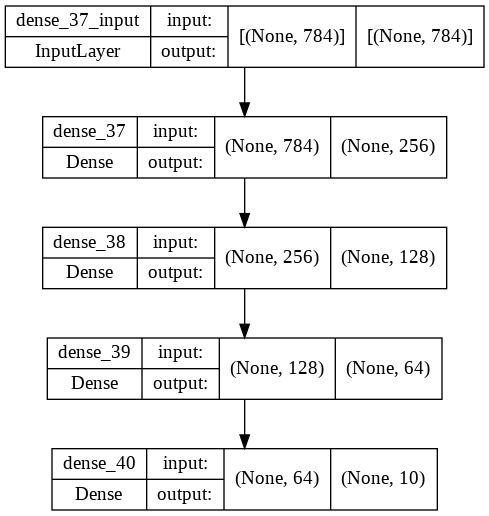

In [26]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

## 4.2

In [ ]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)

Epoch 1/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9785
Epoch 2/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0585 - accuracy: 0.9806
Epoch 3/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0528 - accuracy: 0.9832
Epoch 4/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9844
Epoch 5/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 6/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0399 - accuracy: 0.9869
Epoch 7/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9873
Epoch 8/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 9/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0323 - accuracy: 0.9894
Epoch 10/100
2000/2000 [==============================] - 7s 4ms/step - l

Przy epoce równej 26 widzimy moment stabilizacji, nie ma spadku parametru loss i wzrostu accuracy na kolejnych epokach. Accuracy utrzymuje sie na poziomie 0.993-0.996, loss natomiast 0.012-0.019.

## 4.3

In [30]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2829 - accuracy: 0.9122
Epoch 2/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1397 - accuracy: 0.9564
Epoch 3/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1095 - accuracy: 0.9663
Epoch 4/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0908 - accuracy: 0.9710
Epoch 5/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0779 - accuracy: 0.9750


 Nie jest zauważalne poprawienie się parametrów loss i accuracy podczas kolejnych 5 epoch sieci w zmodyfikowanym modelu. Loss od pierwszej epoce na poziomie 0.28-0.079 i accuracy 0.91-0.97. Bardzo podobnie jak w w *batch_size*=30.

## 4.4

In [23]:
from keras.layers import Dropout
model = Sequential([
  Dense(512, activation='relu', input_shape=(784,)),
  Dropout(0.5),
  Dense(258, activation='relu'),
  Dense(64, activation='softmax'),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)


Epoch 1/10
2000/2000 [==============================] - 13s 6ms/step - loss: 1.6176 - accuracy: 0.4480
Epoch 2/10
2000/2000 [==============================] - 13s 6ms/step - loss: 1.1870 - accuracy: 0.4913
Epoch 3/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.9179 - accuracy: 0.6554
Epoch 4/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.6670 - accuracy: 0.7576
Epoch 5/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.4832 - accuracy: 0.8754
Epoch 6/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.3729 - accuracy: 0.9051
Epoch 7/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.3215 - accuracy: 0.9168
Epoch 8/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.2940 - accuracy: 0.9227
Epoch 9/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.2713 - accuracy: 0.9287
Epoch 10/10
2000/2000 [==============================] - 11s 6ms/step - l

Wraz z kolejnymi epokami uzyskujemy wyższe accuracy, loss sie powoli stabilizuje przy poziomie 0.25. Model ten jest dużo słabszy od wyjściowego

### 4.5


In [ ]:
model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(256, activation='linear'),
  Dense(256, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear')
])

In [ ]:
print(model_x.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               200960    
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 128)               16512     
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dense_50 (Dense)            (None, 64)               

In [24]:
model_y = model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear')
])

In [ ]:
print(model_y.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               200960    
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='linear')
])
model_x.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_x.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 13s 6ms/step - loss: 11.0930 - accuracy: 0.1121
Epoch 2/10
2000/2000 [==============================] - 12s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 3/10
2000/2000 [==============================] - 12s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 4/10
2000/2000 [==============================] - 11s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 5/10
2000/2000 [==============================] - 12s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 6/10
2000/2000 [==============================] - 11s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 7/10
2000/2000 [==============================] - 11s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 8/10
2000/2000 [==============================] - 12s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 9/10
2000/2000 [==============================] - 11s 6ms/step - loss: 11.1395 - accuracy: 0.1124
Epoch 10/10
2000/2000 [==============================] - 12s 6ms

In [17]:
model_y = model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(128, activation='softmax'),
  Dense(64, activation='relu'),
  Dense(10, activation='linear')
])
model_y.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_y.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.1353 - accuracy: 0.0974
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 6/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 8/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 9/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.1702 - accuracy: 0.0974
Epoch 10/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.170

In [21]:
model_z  = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='softmax')
])
model_z.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_z.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2887 - accuracy: 0.9120
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1588 - accuracy: 0.9520
Epoch 3/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.1286 - accuracy: 0.9607
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1120 - accuracy: 0.9663
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1001 - accuracy: 0.9685




*   model_x i model_y niezależnie od ilości epok i funkcji warstw ukrytych przyjmują stałe wartości accuracy i loss podczas trenowania modeli. Dzieje się tak dlatego że funkcją aktywacji i funkcją wyjścia jest funkcja typu linear
*   Gdy tylko zamieni sie funkcje aktywacji i wyjscia na inna niż linear model zacznie progresować podczas trenowania- warunek konieczny.